# COMP 7570: Blockchain Data Analytics
Author: Md. Monowar Anjum (anjumm1@myumanitoba.ca)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [2]:
plt.style.use('seaborn-darkgrid')

In [3]:
data_folder = '/Users/monowar/Documents/DataFromRipple'

In [4]:
import os

In [5]:
# Get the data files
btc_data_file = os.path.join(data_folder, 'HourlyBTC.csv')
xrp_data_file = os.path.join(data_folder, 'XRP_hourly_tx.csv')
usd_data_file = os.path.join(data_folder, 'Hourly_tx_USD.csv')
eur_data_file = os.path.join(data_folder, 'HourlyTxEur.csv')

In [6]:
# Read the data into the Dataframe
hourly_btc_df = pd.read_csv(btc_data_file)
hourly_xrp_df = pd.read_csv(xrp_data_file)
hourly_usd_df = pd.read_csv(usd_data_file)
hourly_eur_df = pd.read_csv(eur_data_file)

In [16]:
hourly_btc_df.head()

,DateHour,BTC_SUM,Tx_count_BTC
0,01T00,9.154021e+05,1210
1,01T01,1.010394e+06,1283
2,01T02,9.767385e+05,1285
3,01T03,9.377738e+05,1272
4,01T04,9.373335e+05,1320


In [17]:
hourly_xrp_df.head()

,DateHour,XRP_SUM,Tx_count_XRP
0,01T00,52885859372625,2001
1,01T01,32918154606737,2023
2,01T02,27314309120781,2050
3,01T03,23002070096908,2334
4,01T04,36646502766179,2529


In [49]:
hourly_usd_df.head()

,DateHour,USD_SUM,Tx_count_USD
0,01T00,20999.272727,14
1,01T01,118471.000000,87
2,01T02,98284.734441,88
3,01T03,57212.203324,76
4,01T04,73023.003080,135


In [72]:
hourly_eur_df.head()

,DateHour,EUR_SUM,Tx_count_EUR
0,01T00,13114.0,2
1,01T01,76287.0,11
2,01T02,96057.0,13
3,01T03,51723.0,7
4,01T04,73890.0,10


In [7]:
# Merge all the dataframes into a singular dataframe
merged_df = pd.merge(hourly_btc_df, hourly_xrp_df, on = 'DateHour', how='inner')
merged_df = pd.merge(merged_df, hourly_usd_df, on = 'DateHour', how='inner')
merged_df = pd.merge(merged_df, hourly_eur_df, on = 'DateHour', how='inner')

In [8]:
merged_df.head()

,DateHour,BTC_SUM,Tx_count_BTC,XRP_SUM,Tx_count_XRP,USD_SUM,Tx_count_USD,EUR_SUM,Tx_count_EUR
0,01T00,9.154021e+05,1210,52885859372625,2001,20999.272727,14,13114.0,2
1,01T01,1.010394e+06,1283,32918154606737,2023,118471.000000,87,76287.0,11
2,01T02,9.767385e+05,1285,27314309120781,2050,98284.734441,88,96057.0,13
3,01T03,9.377738e+05,1272,23002070096908,2334,57212.203324,76,51723.0,7
4,01T04,9.373335e+05,1320,36646502766179,2529,73023.003080,135,73890.0,10


In [9]:
# These values are taken from their respective websites
BTC_avg_value = 11461.5
XRP_avg_value = 0.28
EUR_avg_value = 1.23

In [10]:
# COnverting each currency to their respective USD value
merged_df['BTC_val_USD'] = merged_df['BTC_SUM']*BTC_avg_value
merged_df['XRP_val_USD'] = merged_df['XRP_SUM']*XRP_avg_value
merged_df['EUR_val_USD'] = merged_df['EUR_SUM']*EUR_avg_value

In [11]:
merged_df.head()

,DateHour,BTC_SUM,Tx_count_BTC,XRP_SUM,Tx_count_XRP,USD_SUM,Tx_count_USD,EUR_SUM,Tx_count_EUR,BTC_val_USD,XRP_val_USD,EUR_val_USD
0,01T00,9.154021e+05,1210,52885859372625,2001,20999.272727,14,13114.0,2,1.049188e+10,1.480804e+13,16130.22
1,01T01,1.010394e+06,1283,32918154606737,2023,118471.000000,87,76287.0,11,1.158063e+10,9.217083e+12,93833.01
2,01T02,9.767385e+05,1285,27314309120781,2050,98284.734441,88,96057.0,13,1.119489e+10,7.648007e+12,118150.11
3,01T03,9.377738e+05,1272,23002070096908,2334,57212.203324,76,51723.0,7,1.074829e+10,6.440580e+12,63619.29
4,01T04,9.373335e+05,1320,36646502766179,2529,73023.003080,135,73890.0,10,1.074325e+10,1.026102e+13,90884.70


<ipython-input-27-35cc21582466>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel('Total Tx Amount in USD', fontsize = 20)
<ipython-input-27-35cc21582466>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xlabel('DateHour', fontsize = 20)


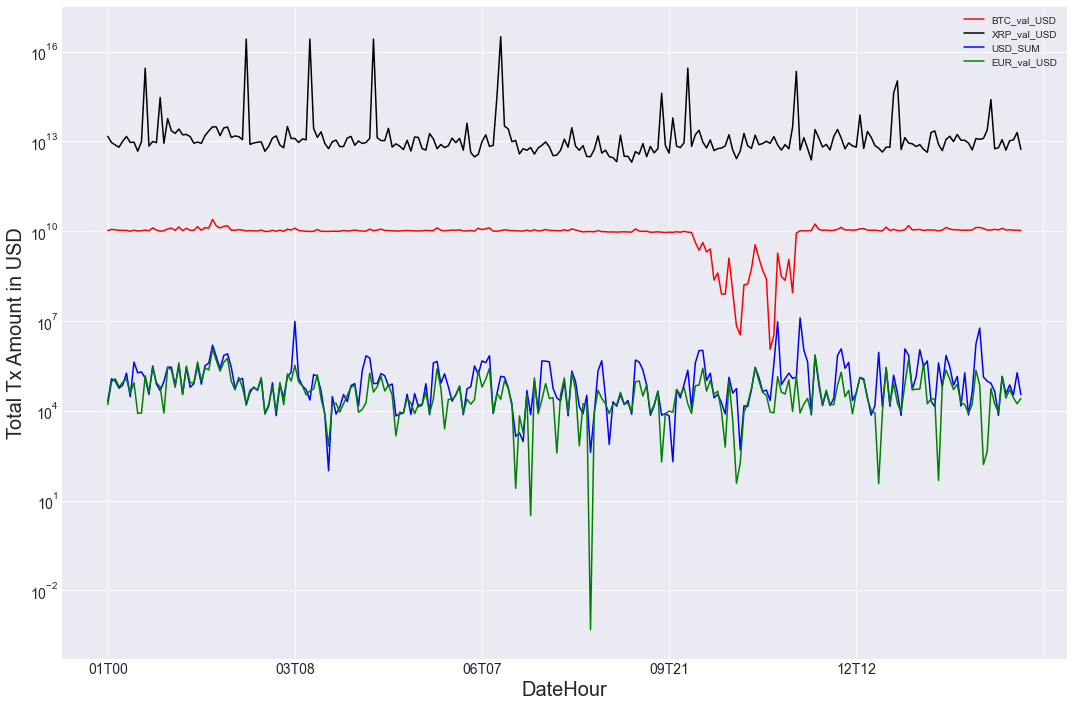

In [27]:
merged_df.set_index('DateHour').plot(y=['BTC_val_USD','XRP_val_USD', 'USD_SUM', 'EUR_val_USD'], 
                                     figsize=(18,12), grid=True, style=['r','k','b','g'], logy=True,linewidth=1.5, fontsize = 14)
plt.axes().set_ylabel('Total Tx Amount in USD', fontsize = 20)
plt.axes().set_xlabel('DateHour', fontsize = 20)
plt.show()

<ipython-input-26-2b2c01923bd8>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel('Tx Count', fontsize = 20)
<ipython-input-26-2b2c01923bd8>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xlabel('DateHour', fontsize = 20)


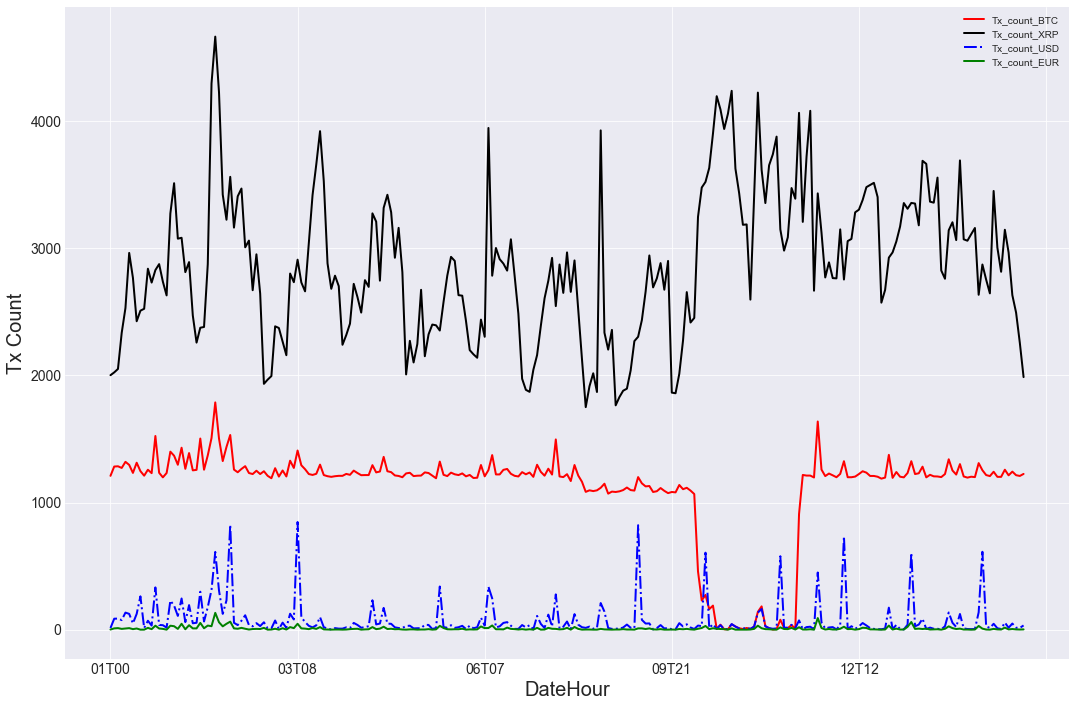

In [26]:
merged_df.set_index('DateHour').plot(y=['Tx_count_BTC','Tx_count_XRP', 'Tx_count_USD', 'Tx_count_EUR'], 
                                     figsize=(18,12), grid=True, style=['r','k','b-.','g'], linewidth=2.0, fontsize = 14)
plt.axes().set_ylabel('Tx Count', fontsize = 20)
plt.axes().set_xlabel('DateHour', fontsize = 20)
plt.show()

In [14]:
# Finding Average TX value 
merged_df['AVG_tx_BTC'] = merged_df['BTC_val_USD']/merged_df['Tx_count_BTC']
merged_df['AVG_tx_XRP'] = merged_df['XRP_val_USD']/merged_df['Tx_count_XRP']
merged_df['AVG_tx_USD'] = merged_df['USD_SUM']/merged_df['Tx_count_USD']
merged_df['AVG_tx_EUR'] = merged_df['EUR_val_USD']/merged_df['Tx_count_EUR']

<ipython-input-28-da8595937f55>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel('Average Tx Amount in USD', fontsize = 20)
<ipython-input-28-da8595937f55>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xlabel('DateHour', fontsize = 20)


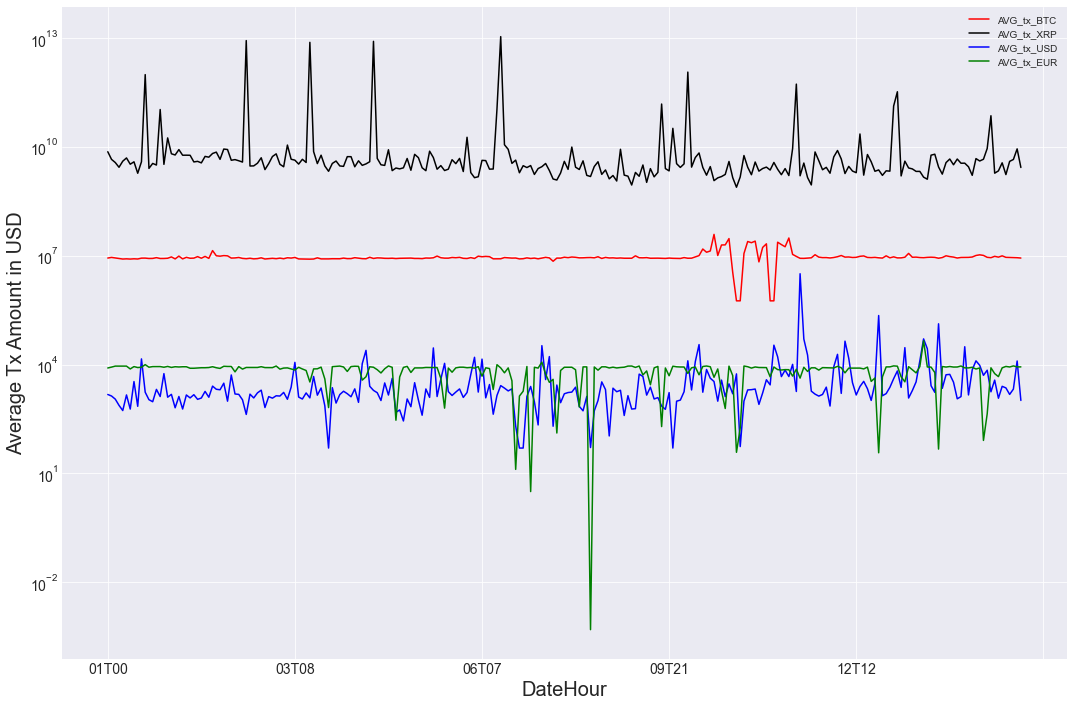

In [28]:
merged_df.set_index('DateHour').plot(y=['AVG_tx_BTC','AVG_tx_XRP', 'AVG_tx_USD', 'AVG_tx_EUR'], 
                                     figsize=(18,12), grid=True, style=['r','k','b','g'], logy=True, fontsize = 14)
plt.axes().set_ylabel('Average Tx Amount in USD', fontsize = 20)
plt.axes().set_xlabel('DateHour', fontsize = 20)
plt.show()

In [16]:
hourly_trend_XRP_df = pd.read_csv(os.path.join(data_folder, 'Hourly_Trend_XRP.csv'))

In [130]:
hourly_trend_XRP_df.head()

,Hour,AVG_TX_XRP,Tx_count_XRP
0,0,1.465766e+10,34305
1,1,1.384774e+10,35960
2,2,5.072455e+10,36404
3,3,2.821307e+11,36769
4,4,1.037728e+10,38334


In [17]:
hourly_trend_BTC_df = pd.read_csv(os.path.join(data_folder, 'Hourly_Trend_BTC.csv'))

In [132]:
hourly_trend_BTC_df.head()

,Hour,AVG_TX_BTC,Tx_count_BTC
0,0,769.793979,16185
1,1,771.577943,15597
2,2,764.543376,15881
3,3,749.801007,15713
4,4,797.763475,16015


In [18]:
merged_hourly_trend_df = pd.merge(hourly_trend_XRP_df, hourly_trend_BTC_df, on='Hour', how='inner')

In [19]:
merged_hourly_trend_df['AVG_TX_XRP_USD'] = merged_hourly_trend_df['AVG_TX_XRP'] * XRP_avg_value
merged_hourly_trend_df['AVG_TX_BTC_USD'] = merged_hourly_trend_df['AVG_TX_BTC'] * BTC_avg_value

In [136]:
merged_hourly_trend_df.head()

,Hour,AVG_TX_XRP,Tx_count_XRP,AVG_TX_BTC,Tx_count_BTC,AVG_TX_XRP_USD,AVG_TX_BTC_USD
0,0,1.465766e+10,34305,769.793979,16185,4.104145e+09,8.822994e+06
1,1,1.384774e+10,35960,771.577943,15597,3.877367e+09,8.843441e+06
2,2,5.072455e+10,36404,764.543376,15881,1.420287e+10,8.762814e+06
3,3,2.821307e+11,36769,749.801007,15713,7.899659e+10,8.593844e+06
4,4,1.037728e+10,38334,797.763475,16015,2.905639e+09,9.143566e+06


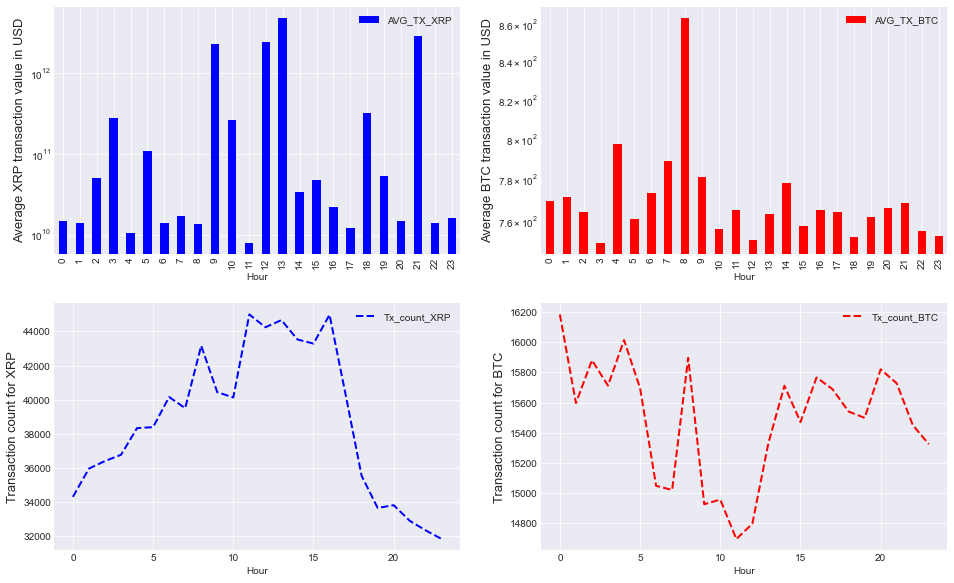

In [20]:
fig, axes = plt.subplots(nrows= 2, ncols = 2)

merged_hourly_trend_df.set_index('Hour').plot( ax = axes[0][0], y=['AVG_TX_XRP'], kind='bar',
                                     figsize=(16,10), grid=True, color='b', logy=True)
axes[0][0].set_ylabel('Average XRP transaction value in USD', fontsize=13)
merged_hourly_trend_df.set_index('Hour').plot(ax = axes[1][0], y=[ 'Tx_count_XRP'], 
                                     figsize=(16,10), grid=True, style=['b--'], linewidth=2.0)

axes[1][0].set_ylabel('Transaction count for XRP', fontsize=13)
merged_hourly_trend_df.set_index('Hour').plot( ax = axes[0][1], y=['AVG_TX_BTC'], kind='bar',
                                     figsize=(16,10), grid=True, color='r', logy=True)
axes[0][1].set_ylabel('Average BTC transaction value in USD', fontsize=13)
merged_hourly_trend_df.set_index('Hour').plot(ax = axes[1][1], y=[ 'Tx_count_BTC'], 
                                     figsize=(16,10), grid=True, style=['r--'], linewidth=2.0)
axes[1][1].set_ylabel('Transaction count for BTC', fontsize=13)
plt.show()